# Porter : Neural Networks Regression Business casee
### Porter, India's largest marketplace for intra-city logistic, is revolutionizing the delivery sector with technology-driven solutions.
This case focuses on leveraging neural networks to accurately predict delivery
times, a critical aspect of customer satisfaction in logistics.
- With a dataset encompassing various aspects of orders and deliveries, Porter
aims to refine its delivery time estimations.
- Analyzing this dataset can provide significant insights into delivery dynamics,
efficiency bottlenecks, and optimization opportunities.
- The insights obtained can enhance Porter's operational efficiency, ensuring
timely deliveries and improving driver-partner allocation.

### Data Dictionary

Each row in this dataset corresponds to a unique delivery, and each column represents a feature critical in predicting delivery times. The dataset 'Porter Data' includes the following variables:
1. market_id: An integer ID indicating the market area of the restaurant.
2. created_at: Timestamp of when the order was placed.
3. actual_delivery_time: Timestamp of when the order was delivered.
4. store_primary_category: Category classification of the restaurant.
5. order_protocol: Numeric code representing the mode of order placement (e.g.,
through Porter, direct call, pre-booking, third-party platform).
6. total_items_subtotal: A combined feature detailing the total number of items in
the order and the final price of the order before taxes and fees.
7. num_distinct_items: Count of different items in the order.
8. min_item_price: Price of the least expensive item in the order.
9. max_item_price: Price of the most expensive item in the order.
10. total_onshift_partners: Number of delivery partners on duty when the order was placed.
11. total_busy_partners: Number of delivery partners busy with other tasks at the order placement time.
12. total_outstanding_orders: Total count of orders pending at the time.

> **_NOTE:_** The target variable for this study, 'estimated_delivery_time', is to be derived from the difference between 'created_at' and 'actual_delivery_time'.

In [26]:
##imports 
import warnings
warnings.filterwarnings("ignore")
#for reading and handling the data
import pandas as pd
import numpy as np
import os

#for visualizinng and analyzing it
import matplotlib.pyplot as plt
import seaborn as sns

#data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#random forest model training
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

#ann training
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,LeakyReLU
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.losses import MeanAbsolutePercentageError

from tensorflow.keras.metrics import MeanAbsolutePercentageError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.optimizers import SGD,Adam

## Load Dataset

In [42]:
## load dataset 
path = r'..\my_Practice\datasets\Porter\dataset.csv\dataset.csv'
df = pd.read_csv(path)

## Observations on Data

In [43]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [44]:
df.shape

(197428, 14)

In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
market_id,196441.0,2.978706,1.524867,1.0,2.0,3.0,4.0,6.0
order_protocol,196433.0,2.882352,1.503771,1.0,1.0,3.0,4.0,7.0
total_items,197428.0,3.196391,2.666546,1.0,2.0,3.0,4.0,411.0
subtotal,197428.0,2682.331402,1823.093688,0.0,1400.0,2200.0,3395.0,27100.0
num_distinct_items,197428.0,2.670791,1.630255,1.0,1.0,2.0,3.0,20.0
min_item_price,197428.0,686.218470,522.038648,-86.0,299.0,595.0,949.0,14700.0
max_item_price,197428.0,1159.588630,558.411377,0.0,800.0,1095.0,1395.0,14700.0
total_onshift_partners,181166.0,44.808093,34.526783,-4.0,17.0,37.0,65.0,171.0
total_busy_partners,181166.0,41.739747,32.145733,-5.0,15.0,34.0,62.0,154.0
total_outstanding_orders,181166.0,58.050065,52.661830,-6.0,17.0,41.0,85.0,285.0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [47]:
'''Observations :
1. Dataset has 197428 rows and 14 columns.
2. On an average customer orders 3 items from Porter.
3. On an average user pays 2683/- for availing porter service.
4. Column of object type needs to converted into appropriate type. 
'''


'Observations :\n1. Dataset has 197428 rows and 14 columns.\n2. On an average customer orders 3 items from Porter.\n3. On an average user pays 2683/- for availing porter service.\n4. Column of object type needs to converted into appropriate type. \n'

In [48]:
#check unque value count of features
df.nunique()

market_id                        6
created_at                  180985
actual_delivery_time        178110
store_id                      6743
store_primary_category          74
order_protocol                   7
total_items                     57
subtotal                      8368
num_distinct_items              20
min_item_price                2312
max_item_price                2652
total_onshift_partners         172
total_busy_partners            159
total_outstanding_orders       281
dtype: int64

In [49]:
df.isnull().sum()

market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

## Data preprocessing

### **1. Feature engineering:** Creating the target column time taken in each delivery from order timestamp (created_at) and delivery timestamp (actual_delivery_time)

In [51]:
#convert column "created_at" and "actual_delivery_time" to pandas datetime
df["actual_delivery_time"] = pd.to_datetime(df["actual_delivery_time"])
df["created_at"]=pd.to_datetime(df["created_at"])

In [52]:
#Create new feature "delivery_time" by substracting "created_at" from "actual_delivery_time"
df["delivery_time"] = df["actual_delivery_time"] - df["created_at"]

**2. Getting hour of day from the order time and also the day of the week**

In [54]:
df["hour"] = df["created_at"].dt.hour
df["day"] = df["created_at"].dt.dayofweek


**3. Understanding pandas datetime data type and what function it provides by default**

In [56]:
#Timedelta is the pandas equivalent of python’s datetime.timedelta and is interchangeable with it in most cases.
#1. Convert the df["actual_delivery_time"] series to pandas timedelta 2. Convert it to seconds 3. Divide by 60 to get the delivery time in minutes
df["delivery_time"] = pd.to_timedelta(df['delivery_time']).dt.total_seconds() / 60
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time,hour,day
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333,22,4
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667,21,1
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,29.683333,20,3
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,51.250000,21,1
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,39.833333,2,6


### 3. Handling null values

In [57]:
##Checking Duplicated values in dataset
df.duplicated().sum()

0

In [58]:
#Dropping the columns which are not needed for model
df.drop(columns=["created_at","actual_delivery_time",'store_id'], inplace=True)

In [59]:
##Find uniques values for each feature
df.nunique()

market_id                      6
store_primary_category        74
order_protocol                 7
total_items                   57
subtotal                    8368
num_distinct_items            20
min_item_price              2312
max_item_price              2652
total_onshift_partners       172
total_busy_partners          159
total_outstanding_orders     281
delivery_time               7134
hour                          19
day                            7
dtype: int64

In [60]:
cat_cols = ["market_id", "order_protocol","store_primary_category","hour","day"]
for i in cat_cols:
  print(f"{i} : {df[i].unique()}")

market_id : [ 1.  2.  3.  4. nan  5.  6.]
order_protocol : [ 1.  2.  3.  4. nan  5.  6.  7.]
store_primary_category : ['american' 'mexican' nan 'indian' 'italian' 'sandwich' 'thai' 'cafe'
 'salad' 'pizza' 'chinese' 'singaporean' 'burger' 'breakfast'
 'mediterranean' 'japanese' 'greek' 'catering' 'filipino'
 'convenience-store' 'other' 'korean' 'vegan' 'asian' 'barbecue' 'fast'
 'dessert' 'smoothie' 'seafood' 'vietnamese' 'cajun' 'steak'
 'middle-eastern' 'soup' 'vegetarian' 'persian' 'nepalese' 'sushi'
 'latin-american' 'hawaiian' 'chocolate' 'burmese' 'british' 'pasta'
 'alcohol' 'dim-sum' 'peruvian' 'turkish' 'malaysian' 'ethiopian' 'afghan'
 'bubble-tea' 'german' 'french' 'caribbean' 'gluten-free' 'comfort-food'
 'gastropub' 'pakistani' 'moroccan' 'spanish' 'southern' 'tapas' 'russian'
 'brazilian' 'european' 'cheese' 'african' 'argentine' 'kosher' 'irish'
 'lebanese' 'belgian' 'indonesian' 'alcohol-plus-food']
hour : [22 21 20  2  3  0  1 19  4 23  5 18  6 17 16 15 14  7  8]
day : 

**Inferences** : store_primary_category and order_protocol are categorical columns

In [61]:
#Check null values
df.isnull().sum()

market_id                     987
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
delivery_time                   7
hour                            0
day                             0
dtype: int64

In [62]:
print("Percentage of null values in the dataset")
df.isnull().sum()/df.shape[0] * 100

Percentage of null values in the dataset


market_id                   0.499929
store_primary_category      2.411006
order_protocol              0.503981
total_items                 0.000000
subtotal                    0.000000
num_distinct_items          0.000000
min_item_price              0.000000
max_item_price              0.000000
total_onshift_partners      8.236927
total_busy_partners         8.236927
total_outstanding_orders    8.236927
delivery_time               0.003546
hour                        0.000000
day                         0.000000
dtype: float64

In [63]:
#dropping the 7 row in "delivery_time"
df.dropna(subset=["delivery_time"],inplace =True)

In [64]:
#imputing mode of column in categorical columns
for i in cat_cols:
  a = df[i].mode()
  #print(a[0])
  df[i].fillna(a[0],inplace = True)

In [65]:
#Check null values
df.isnull().sum()

market_id                       0
store_primary_category          0
order_protocol                  0
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
delivery_time                   0
hour                            0
day                             0
dtype: int64

##**4. Encoding categorical columns**

### We observe that the column "**store_primary_category**" is categorical column which need to encoded for model. Since the length = 73, we will use target encoding and avoid using one hot encoding as this will increase the dimentionality


In [68]:
# Calculate the mean of the 'Target' variable for each category
category_means = df.groupby('store_primary_category')['delivery_time'].mean().to_dict()

# Map the means back to the 'Category' column to perform target encoding
df['store_primary_category'] = df['store_primary_category'].map(category_means)

In [69]:
# Group by 'market_id' and impute missing 'total_onshift_partners', 'total_busy_partners', and 'total_outstanding_orders' with the median of the group
df['total_onshift_partners'] = df.groupby('market_id')['total_onshift_partners'].transform(lambda x: x.fillna(x.median()))
df['total_busy_partners'] = df.groupby('market_id')['total_busy_partners'].transform(lambda x: x.fillna(x.median()))
df['total_outstanding_orders'] = df.groupby('market_id')['total_outstanding_orders'].transform(lambda x: x.fillna(x.median()))

In [70]:
df.isna().sum()

market_id                   0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
delivery_time               0
hour                        0
day                         0
dtype: int64

##**5. Data visualization and cleaning**

<Axes: >

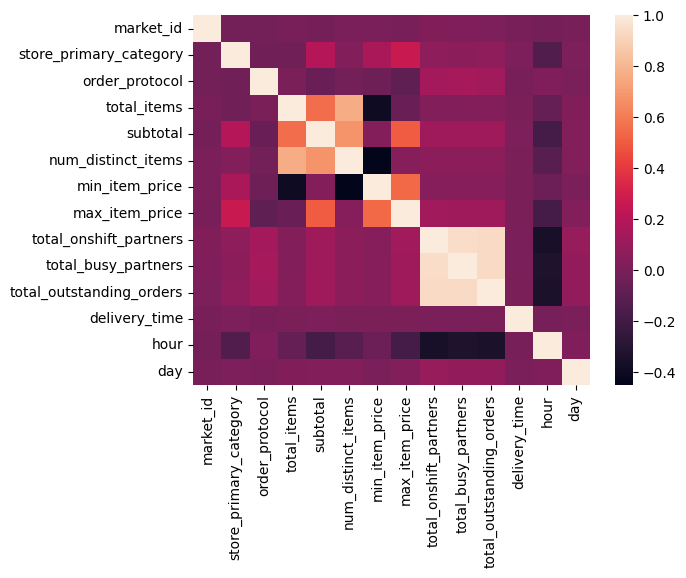

In [72]:
sns.heatmap(df.corr())

**Inference :** We observe that delivery_time does not show correlation with other feature indicating the presence of non linear relationship

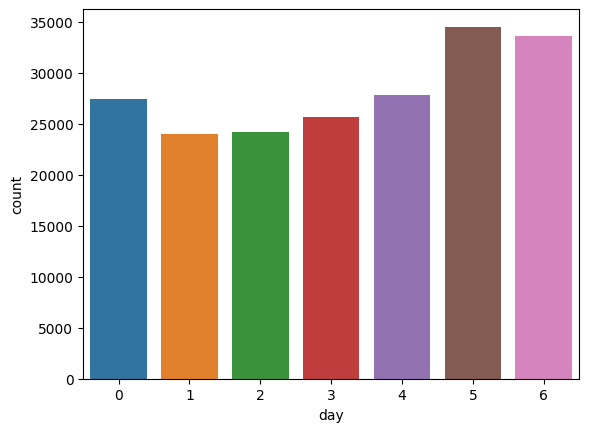

In [73]:
sns.countplot(x=df.day)
plt.show()

**Inference :** The number of orders created are more during weekends.

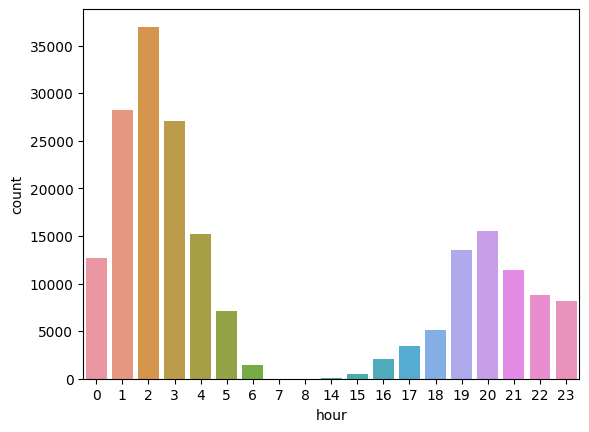

In [74]:
sns.countplot(x=df.hour)
plt.show()

**Inference :** Number of delivery of orders increases as the week progresses. There is no delivery done between Between 6 AM and 2PM.

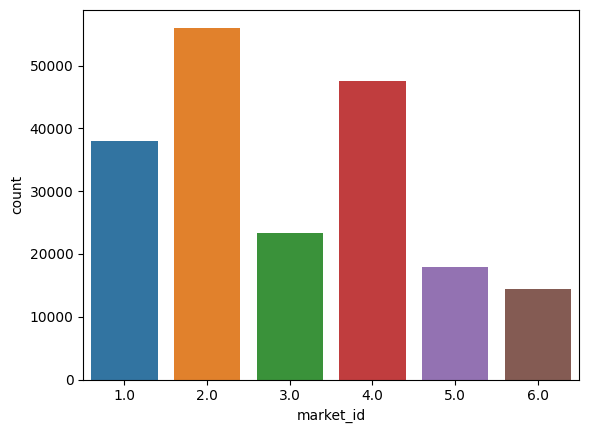

In [76]:
sns.countplot(x=df.market_id)
plt.show()

**Inference :** The Number of order related to Market Id = 2.0 are highest while Market_id = 5.0 lowest

In [78]:
df["delivery_time"].sort_values()

63294          1.683333
862            3.716667
30562          4.950000
42507          5.350000
117928         5.416667
              ...      
190860       907.450000
83055        950.533333
27189       5541.366667
185550      6231.316667
2690      141947.650000
Name: delivery_time, Length: 197421, dtype: float64

##**6. Check if the data contains outliers**

<Axes: xlabel='delivery_time', ylabel='subtotal'>

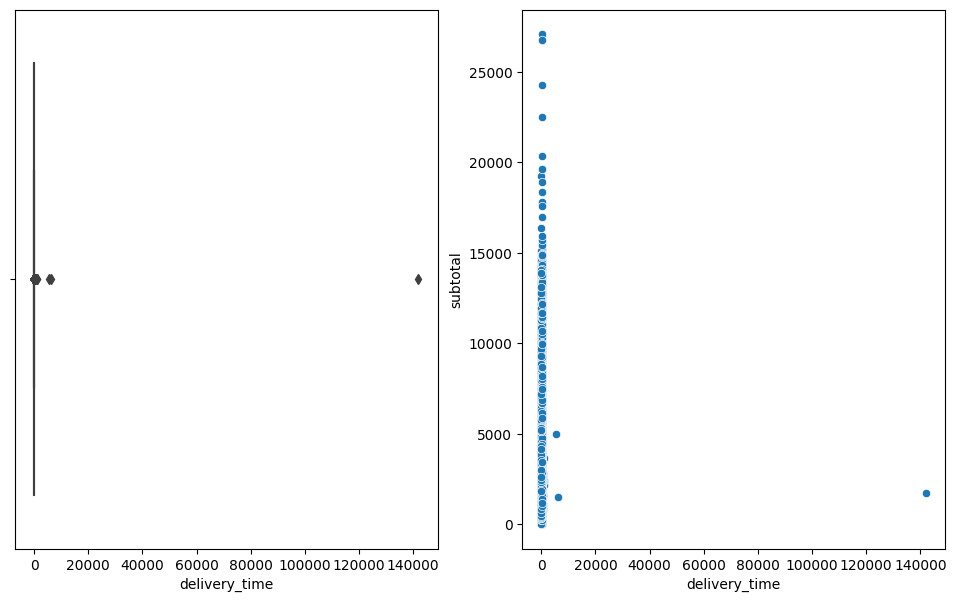

In [79]:
#Bivariant Analysis
#rows, cols = 1, 2
fig, axs = plt.subplots(1,2, figsize = (12,7))
sns.boxplot(x=df["delivery_time"], data = df,ax=axs[0])
sns.scatterplot(x='delivery_time',y='subtotal',data=df,ax=axs[1])

**Observation**:There are outliers present in the dataset.

In [81]:
## Removing outliers by interquartile method
Q3 = df['delivery_time'].quantile(0.75)
Q1 = df['delivery_time'].quantile(0.25)
IQR = Q3-Q1
df = df[(df['delivery_time'] > Q1 - 1.5*IQR) & (df['delivery_time'] < Q3 + 1.5*IQR)]

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191143 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 191143 non-null  float64
 1   store_primary_category    191143 non-null  float64
 2   order_protocol            191143 non-null  float64
 3   total_items               191143 non-null  int64  
 4   subtotal                  191143 non-null  int64  
 5   num_distinct_items        191143 non-null  int64  
 6   min_item_price            191143 non-null  int64  
 7   max_item_price            191143 non-null  int64  
 8   total_onshift_partners    191143 non-null  float64
 9   total_busy_partners       191143 non-null  float64
 10  total_outstanding_orders  191143 non-null  float64
 11  delivery_time             191143 non-null  float64
 12  hour                      191143 non-null  int32  
 13  day                       191143 non-null  int32 

<Axes: xlabel='delivery_time', ylabel='subtotal'>

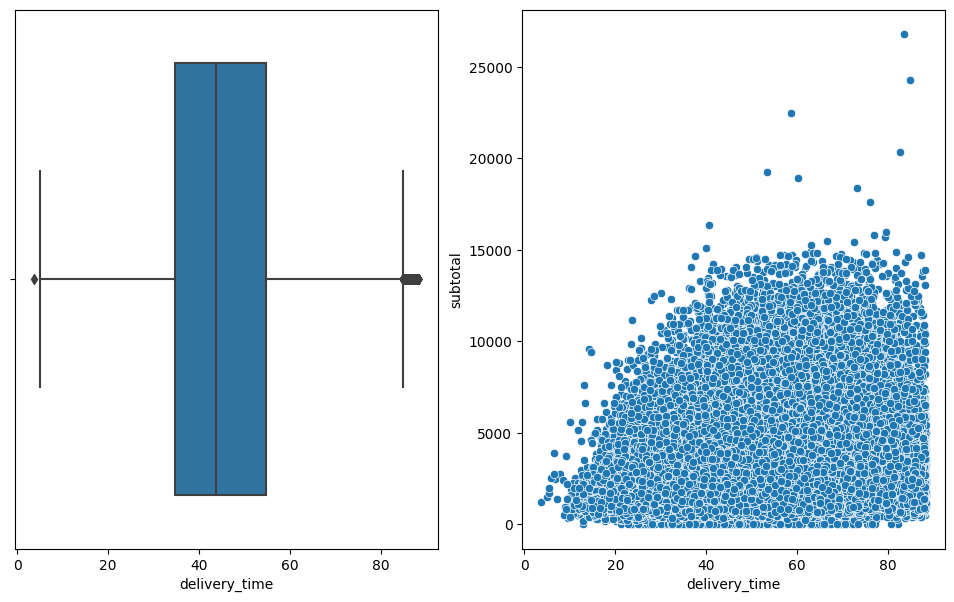

In [83]:
#Plotting the data again to see if anything has improved

fig, axs = plt.subplots(1,2, figsize = (12,7))
sns.boxplot(x=df["delivery_time"], data = df,ax=axs[0])
sns.scatterplot(x='delivery_time',y='subtotal',data=df,ax=axs[1])

**We can see that after removing outliers our data is looking better**

##**7. Split the data in train and test**

In [86]:
# Define your features (X) and target variable (y)
X = df.drop(columns = ["delivery_time"], axis = 1)
y = df["delivery_time"]


In [87]:
X.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,hour,day
0,1.0,47.948328,1.0,4,3441,4,557,1239,33.0,14.0,21.0,22,4
1,2.0,44.546868,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,21,1
2,3.0,47.948328,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,20,3
3,3.0,47.948328,1.0,6,6900,5,600,1800,1.0,1.0,2.0,21,1
4,3.0,47.948328,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,2,6


In [88]:
# Split the data into a training set (80%) and a testing set (20%)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(152914, 13) (152914,)
(38229, 13) (38229,)


##**8. Creating a baseline model using random forest**

In [90]:
regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)

RandomForestRegressor()

##**9. Checking its various metrics like MSE, RMSE, MAE**

In [93]:
y_hat=regressor.predict(X_test)
mse=mean_squared_error(y_test,y_hat)
rmse=mse**.5
print("Mean Squared Error : ",mse)
print("Root Mean Squared Error : ",rmse)
mae=mean_absolute_error(y_test,y_hat)
print("Mean Absolute Error : ",mae)
r2_score_RF = r2_score(y_test,y_hat)
print("r2_score : ",r2_score_RF)

Mean Squared Error :  162.12047248371
Root Mean Squared Error :  12.732653787946564
Mean Absolute Error :  10.096765200725411
r2_score :  0.2554586368308128


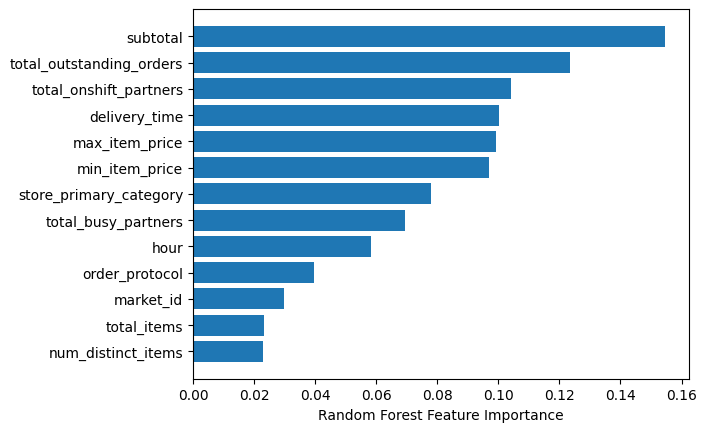

In [94]:
sorted_idx=regressor.feature_importances_.argsort()
plt.barh(df.columns[sorted_idx],regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.show()

##**10. Scaling the data for neural networks.**

**Feature scaling** involves adjusting all variables or features so that they are on the same scale. This is done to prevent one feature from overpowering others, which could result in it being ignored by the Machine Learning Model. Two main techniques of feature scaling are Normalization and Standardization. We will be using MinMaxScaler



In [95]:
# Scale the data
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler()
x_scaled=scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

##**11. Creating a simple neural network**

In [96]:
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.optimizers import Adam
## Create a simple neural network model
model = Sequential([
    Dense(64, activation='relu', kernel_initializer='normal', input_shape=(X_train.shape[1],)),
    Dense(516, activation='relu'),
    Dense(1024,activation='relu'),
    Dense(256,activation='relu'),
    Dense(1,activation='linear') # Since it's a regression task, use 1 output neuron
])

##**12. Training the neural network for required amount of epochs**

In [98]:
##Compile the model with appropriate loss function, optimizer, and metrics

adam=Adam(learning_rate=0.01)
model.compile(loss='mse',optimizer=adam,metrics=['mse','mae'])

##Training the neural network for required amount of epochs
history=model.fit(X_train,y_train,epochs=30,batch_size=512,verbose=1,validation_split=0.2)

Epoch 1/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 1040.1213 - mae: 23.4855 - mse: 1040.1213 - val_loss: 179.3872 - val_mae: 10.5811 - val_mse: 179.3872
Epoch 2/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 179.8596 - mae: 10.6729 - mse: 179.8596 - val_loss: 177.8984 - val_mae: 10.7948 - val_mse: 177.8984
Epoch 3/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 178.0500 - mae: 10.6073 - mse: 178.0500 - val_loss: 173.6948 - val_mae: 10.4475 - val_mse: 173.6948
Epoch 4/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 174.6456 - mae: 10.4899 - mse: 174.6456 - val_loss: 172.9011 - val_mae: 10.4504 - val_mse: 172.9011
Epoch 5/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 174.0757 - mae: 10.4695 - mse: 174.0757 - val_loss: 171.8765 - val_mae: 10.4191 - val_mse: 171.8765
Epoch 6/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - loss: 175.1750 - mae: 10.5026 - mse: 175.1750 - val_loss: 171.7096 - val_mae: 10.4851 - val_mse: 171.7096
Epoch 7/30
239/239 ━━━━━━━━━━

##**13. Plotting the losses and checking the accuracy of the model**

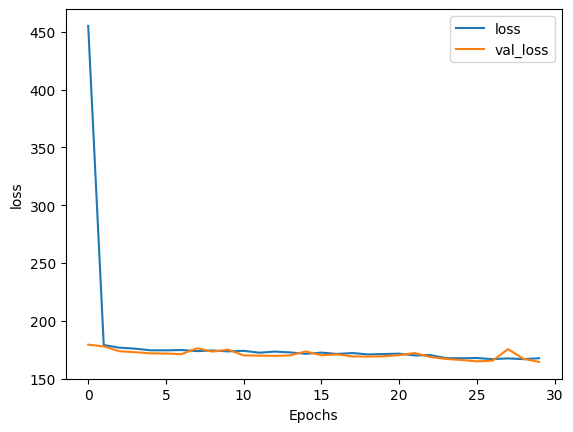

In [99]:
def plot_history(history,key):
    plt.plot(history.history[key])
    plt.plot(history.history['val_'+key])
    plt.xlabel("Epochs")
    plt.ylabel(key)
    plt.legend([key,'val_'+key])
    plt.show()
#plot the history
plot_history(history,'loss')

**Inference:** val loss is mostly below training loss so our model is not overfitting

In [100]:
z= model.predict(X_test)

1195/1195 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [101]:
mse=mean_squared_error(y_test,z)
rmse=mse**.5
print("Mean Squared Error : ",mse)
print("Root Mean Squared Error : ",rmse)
mae=mean_absolute_error(y_test,z)
print("Mean Absolute Error : ",mae)
r2_score_RF = r2_score(y_test,z)
print("r2_score : ",r2_score_RF)


Mean Squared Error :  165.26472720588464
Root Mean Squared Error :  12.855532941340263
Mean Absolute Error :  10.149852084276159
r2_score :  0.24101858702628065


##**14. Comparing the results of neural network and random forest**

Here's a comparison of the results between the Random Forest Regressor and the Simple Neural Network model:

**Random Forest Regressor:**

Mean Squared Error (MSE): 161.47 Mean Absolute Error (MAE): 10.07 R-squared (R2): 0.258 Root Mean Squared Error (RMSE):12.7

**Simple Neural Network Model:**

Mean Squared Error (MSE): 165.322 Mean Absolute Error (MAE): 10.2 R-squared (R2): 0.2407 Root Mean Squared Error (RMSE):12.857

**Inference :** All the metrics are more or less same for both the model. Although, In this specific scenario, the Random Forest Regressor appears to be negligibly better-performing model.